   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

<ipython-input-2-8650e8539186>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  suicide_data_filled = suicide_data.fillna(method='ffill')


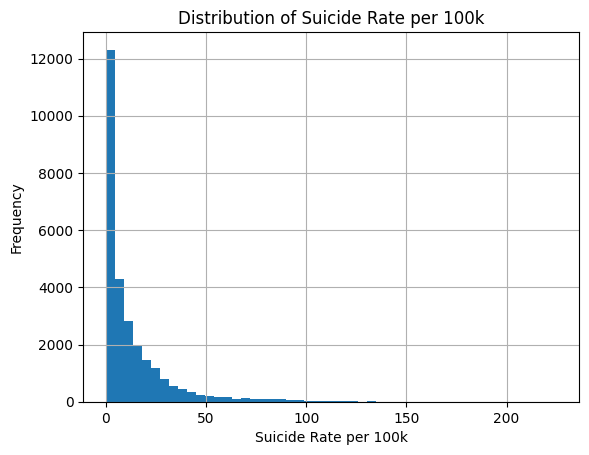

Suicides by Gender:
 sex
male      13910
female    13910
Name: count, dtype: int64
Suicides by Generation:
 generation
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: count, dtype: int64
Bivariate Analysis (Suicides by Gender and Age):
 age     15-24 years  25-34 years  35-54 years  5-14 years  55-74 years  \
sex                                                                      
female       175437       208823       506233       16997       430036   
male         633105       915089      1945908       35267      1228407   

age     75+ years  
sex                
female     221984  
male       431134  


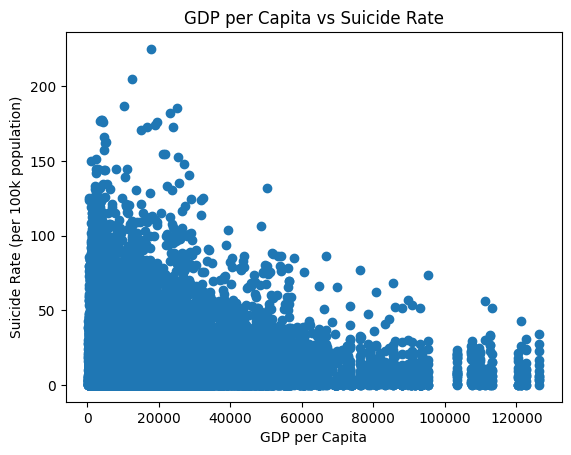

Merged Data:
    country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  gdp_growth  
0                 796     Generation X         3.5  
1                 796           Silent         3.5  
2        

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv"
suicide_data = pd.read_csv(url)

# Check the first few rows of the dataset
print(suicide_data.head())

# Check for missing values
missing_data = suicide_data.isnull().sum()
print("Missing Data:\n", missing_data)

# Handle missing data (forward-fill)
suicide_data_filled = suicide_data.fillna(method='ffill')
print("Data after forward fill:\n", suicide_data_filled.head())

# Or drop rows with any missing values
suicide_data_dropped = suicide_data.dropna()
print("Data after dropping missing values:\n", suicide_data_dropped.head())

# Check for duplicates and remove them
duplicates = suicide_data.duplicated()
print("Duplicate Rows:", duplicates.sum())

# Remove duplicate rows
suicide_data_no_duplicates = suicide_data.drop_duplicates()
print("Data after removing duplicates:\n", suicide_data_no_duplicates.head())

# Descriptive statistics
print("Descriptive Statistics:\n", suicide_data.describe())

# Univariate Analysis: Histogram of suicide rate per 100k
suicide_data['suicides/100k pop'].hist(bins=50)
plt.title('Distribution of Suicide Rate per 100k')
plt.xlabel('Suicide Rate per 100k')
plt.ylabel('Frequency')
plt.show()

# Count of suicides by gender
print("Suicides by Gender:\n", suicide_data['sex'].value_counts())

# Count of suicides by generation
print("Suicides by Generation:\n", suicide_data['generation'].value_counts())

# Bivariate Analysis: Grouping suicides by gender and age
bivariate_analysis = suicide_data.groupby(['sex', 'age'])['suicides_no'].sum().unstack()
print("Bivariate Analysis (Suicides by Gender and Age):\n", bivariate_analysis)

# Multivariate Analysis: Scatter plot between GDP per capita and suicide rate
plt.scatter(suicide_data['gdp_per_capita ($)'], suicide_data['suicides/100k pop'])
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('GDP per Capita vs Suicide Rate')
plt.show()

# Merging Data Example: Merge with country data
country_data = pd.DataFrame({
    'country': ['Albania', 'Algeria', 'Argentina'],
    'gdp_growth': [3.5, 2.1, 4.2]
})
merged_data = pd.merge(suicide_data, country_data, on='country', how='inner')
print("Merged Data:\n", merged_data.head())

# Creating a new column for suicide rate per 100k population
suicide_data['suicides_rate'] = (suicide_data['suicides_no'] / suicide_data['population']) * 100000
print("Data with Suicide Rate:\n", suicide_data[['country', 'generation', 'suicides_rate']].head())
